<a href="https://colab.research.google.com/github/Amankr351/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mobile Price Range Prediction.

**In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is...**

In [32]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of data_mobile_price_range.csv', encoding = 'ISO-8859-1')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


##Data preparation and cleaning

In [ ]:
data.shape   #The shape of a DataFrame is a tuple of array dimensions that tells the number of rows and columns of a given DataFrame.

(2000, 21)

In [ ]:
data.info()   #The info() method prints information about the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
data.describe()   #The describe() method returns description of the data in the DataFrame.

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
data.columns    #List of columns of the dataframe.

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
data.isnull().sum()  #To know if there is any missing value or Nan value in the dataset, we can use the isnull() function.

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

**Missing data is defined as the values or data that is not stored (or not present) for some variable/s in the given dataset. As we can see there are no null values present in our dataset and therefore we are good to go.**

In [ ]:
data.duplicated().sum()   #Checking for duplicate values.

0

**Duplicate values can cause detrimental effect on our accuracy. Duplicate values can ruin the split between train,test and validation set, which ultimately leads to a biased performance estimates that disappoint the model in production. As we can see there are no duplicate values, so we can move ahead.**

##Exploratory Data Analysis

In [ ]:
sns.set_style('darkgrid')

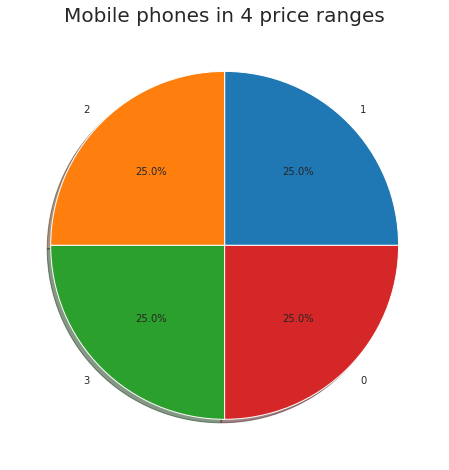

In [ ]:
plt.figure(figsize=(10,8))
labels = data['price_range'].value_counts(sort = True).index                 
sizes = data['price_range'].value_counts(sort = True)
explode = None
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Mobile phones in 4 price ranges',size = 20)
plt.show()                 


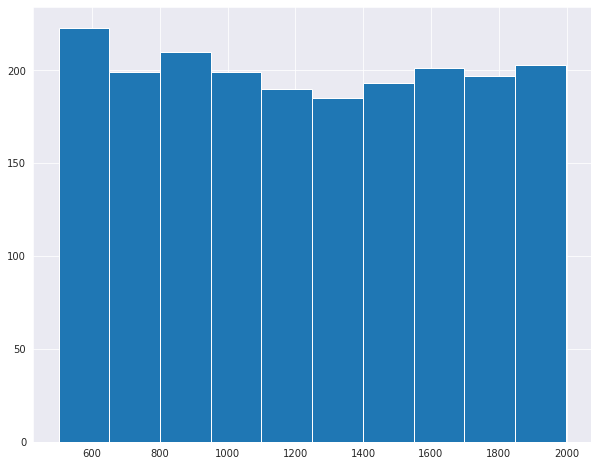

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(data['battery_power']);

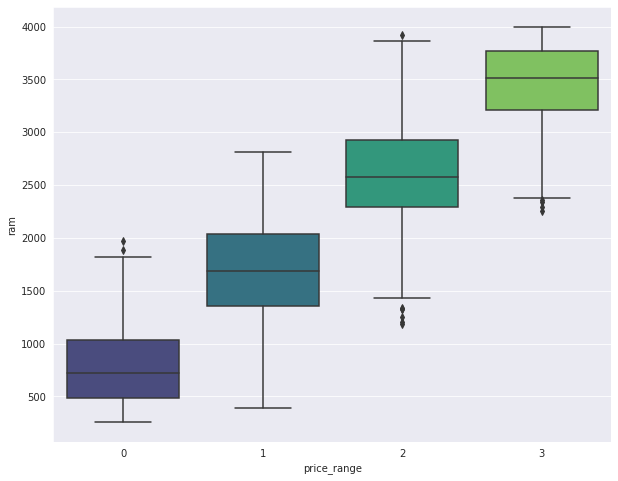

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data, x='price_range', y='ram',  palette= "viridis");

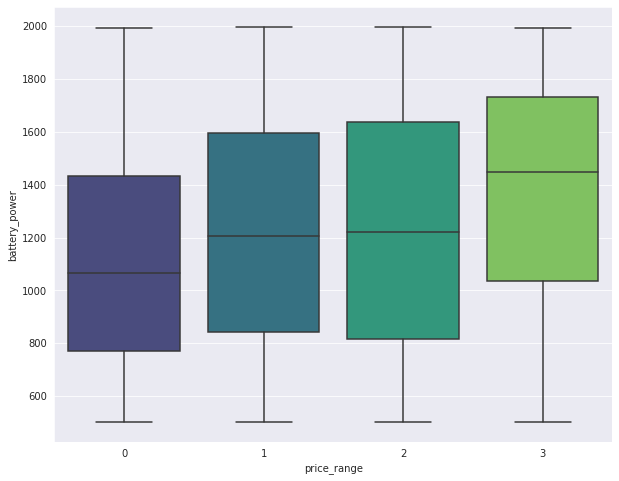

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data, x='price_range', y='battery_power',  palette= "viridis");

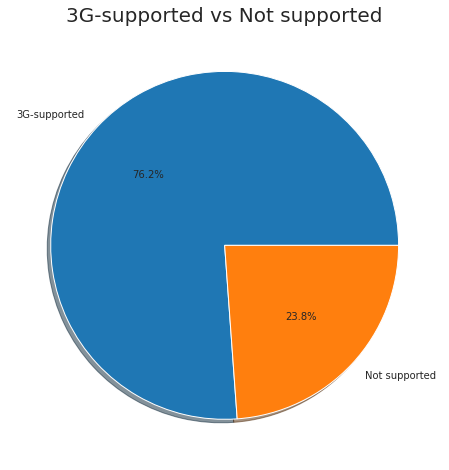

In [ ]:
plt.figure(figsize=(10,8))
labels = ["3G-supported",'Not supported']
sizes=data['three_g'].value_counts()
explode = None
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('3G-supported vs Not supported',size = 20)
plt.show()  



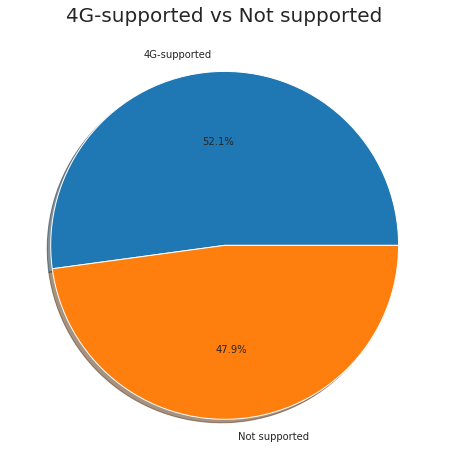

In [ ]:
plt.figure(figsize=(10,8))
labels = ["4G-supported",'Not supported']
sizes=data['four_g'].value_counts()
explode = None
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('4G-supported vs Not supported',size = 20)
plt.show() 

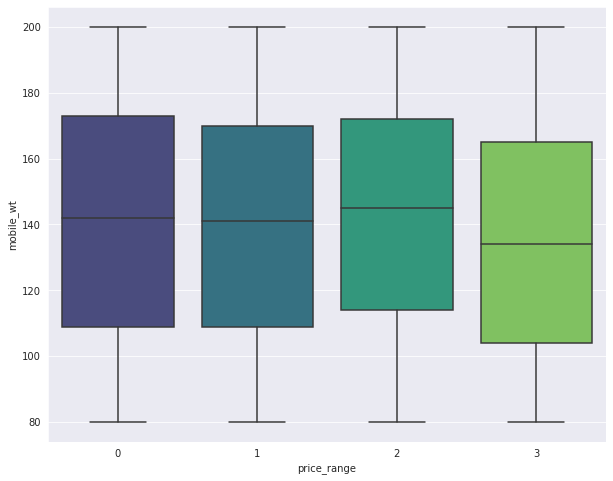

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data, x='price_range', y='mobile_wt',  palette= "viridis");

In [ ]:
data.blue.value_counts()

0    1010
1     990
Name: blue, dtype: int64

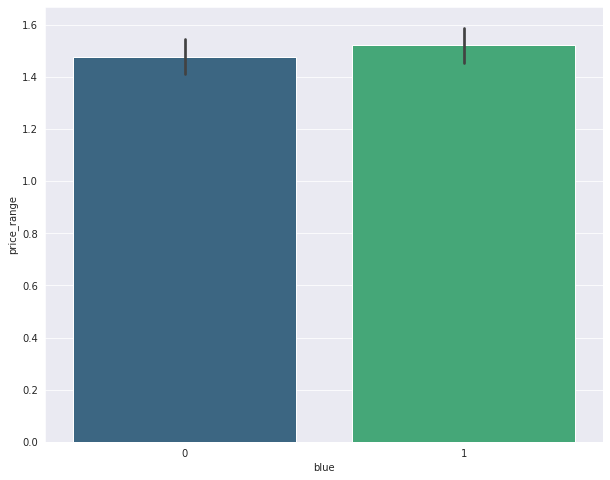

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data = data, x = 'blue', y = 'price_range',  palette= "viridis");

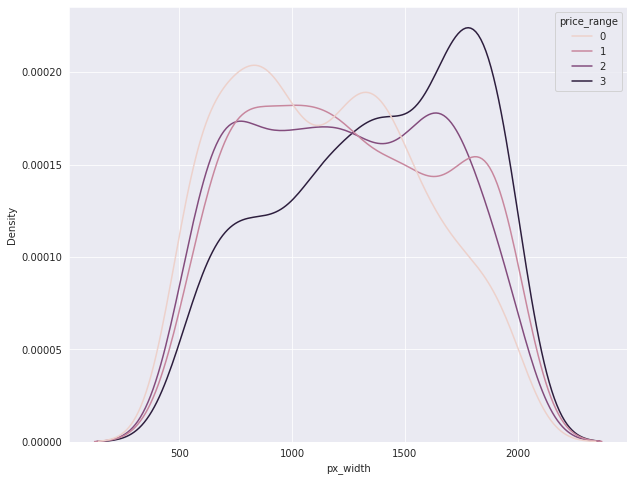

In [ ]:
plt.figure(figsize=(10,8))
sns.kdeplot(data=data, x='px_width', hue='price_range');

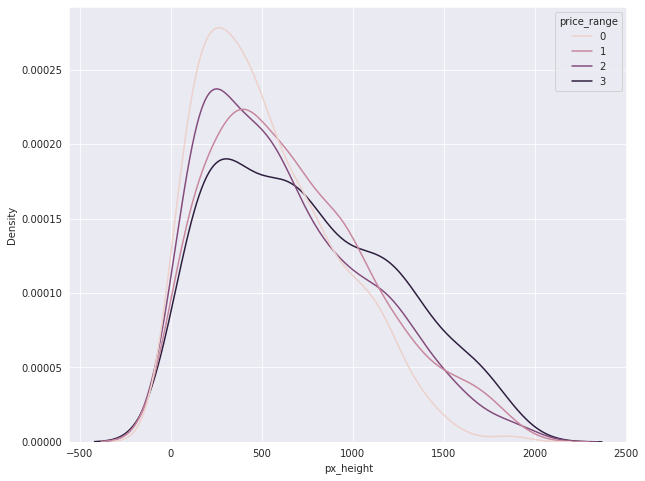

In [ ]:
plt.figure(figsize=(10,8))
sns.kdeplot(data=data, x='px_height', hue='price_range');

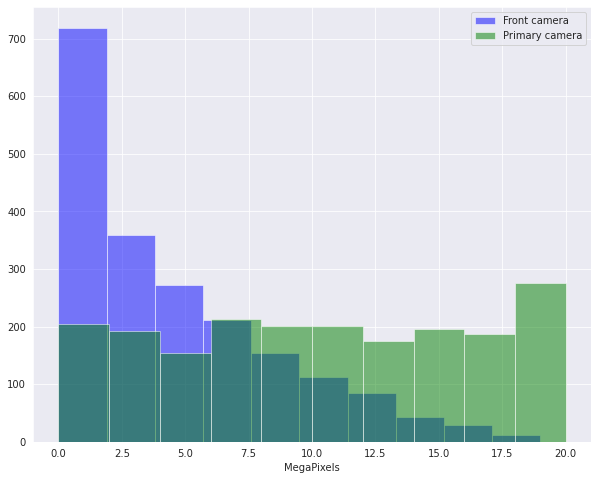

In [ ]:
plt.figure(figsize=(10,8))
data['fc'].hist(alpha=0.5,color='blue',label='Front camera')
data['pc'].hist(alpha=0.5,color='green',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels');

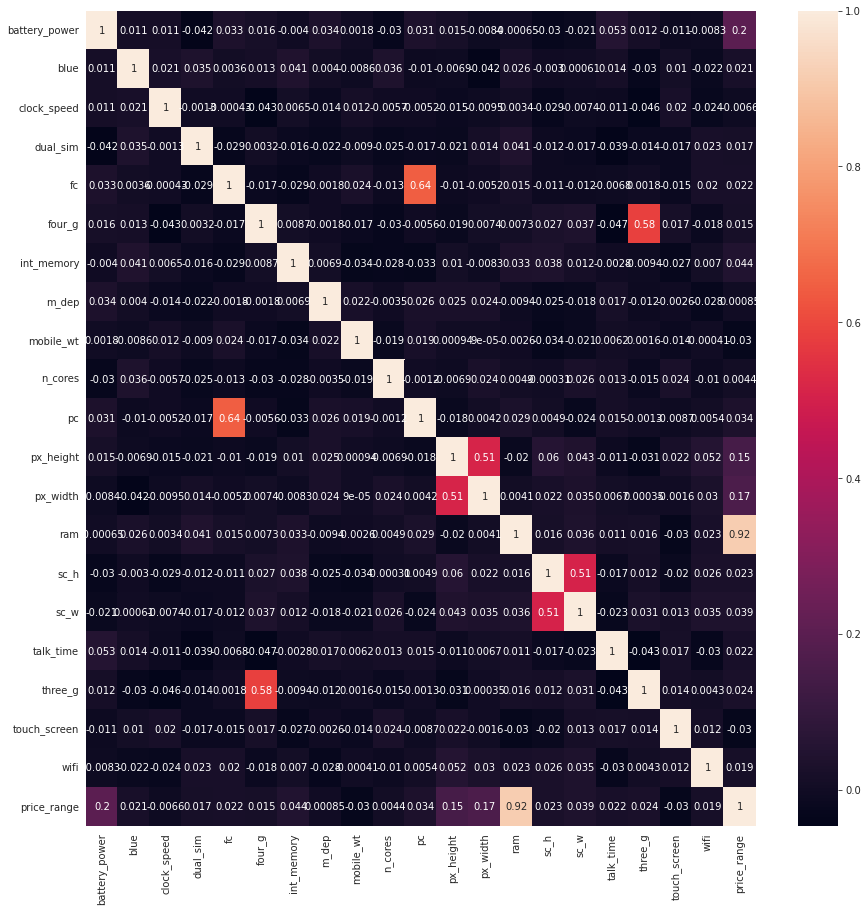

In [ ]:
#Correlation.
corr_df = data.corr()              
plt.figure(figsize=(15, 15))
sns.heatmap(corr_df, 
            annot=True);

In [ ]:
corr_df['price_range'].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [5]:
X = data.drop('price_range',axis=1)
y = data['price_range']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [11]:
#Standardizing the independent variables
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [12]:
#Overview of what a dataframe looks like after standardizing
X_train

array([[ 1.54835969, -0.98142253, -1.23622976, ...,  0.55713671,
         0.9900495 ,  1.00250313],
       [-1.3795348 ,  1.01892912,  0.83711156, ...,  0.55713671,
         0.9900495 ,  1.00250313],
       [-0.01091435, -0.98142253, -0.74838475, ...,  0.55713671,
        -1.0100505 ,  1.00250313],
       ...,
       [ 1.33500924,  1.01892912, -1.23622976, ...,  0.55713671,
        -1.0100505 ,  1.00250313],
       [ 1.55743843, -0.98142253, -0.74838475, ..., -1.79489161,
         0.9900495 ,  1.00250313],
       [-1.37499543,  1.01892912, -1.11426851, ...,  0.55713671,
        -1.0100505 , -0.99750312]])

In [13]:
X_test

array([[ 0.95995168, -1.02532046,  1.18183156, ...,  0.56965192,
         1.0100505 , -1.08347268],
       [-0.10911252, -1.02532046, -1.32403976, ...,  0.56965192,
        -0.9900495 , -1.08347268],
       [ 1.71106143, -1.02532046,  1.68300583, ...,  0.56965192,
         1.0100505 , -1.08347268],
       ...,
       [-0.42706695, -1.02532046,  0.3047766 , ...,  0.56965192,
         1.0100505 ,  0.92295821],
       [-1.15513653, -1.02532046,  1.4324187 , ...,  0.56965192,
         1.0100505 ,  0.92295821],
       [-0.10220046, -1.02532046,  0.43007017, ...,  0.56965192,
         1.0100505 ,  0.92295821]])

In [14]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train , Y_train)

DecisionTreeClassifier()

In [15]:
pred = dtc.predict(X_test)
pred

array([0, 2, 1, 3, 1, 1, 2, 0, 2, 1, 0, 1, 1, 3, 3, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 2, 2, 3, 0, 1, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 1, 0,
       3, 2, 1, 1, 3, 1, 3, 1, 0, 0, 0, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 1,
       3, 3, 1, 1, 2, 2, 0, 1, 2, 0, 0, 3, 2, 1, 3, 2, 1, 0, 1, 3, 2, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 2, 1, 2, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 3, 1, 2, 3, 0,
       2, 3, 0, 3, 1, 0, 0, 2, 2, 1, 2, 3, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 1, 2, 3, 3, 3, 1, 0, 0, 2, 2, 3, 3, 1, 1, 0, 3, 1,
       2, 2, 1, 1, 0, 0, 0, 0, 3, 2, 0, 3, 0, 1, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 1, 2, 2, 3, 3, 1, 2, 0, 0, 1, 2, 1, 1, 3, 1, 1, 3, 1, 1,
       3, 1, 3, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 2, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 0, 2, 2,
       2, 1, 2, 0, 1, 3, 2, 2, 2, 1, 0, 1, 0, 2, 3, 0, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 0, 1, 0, 1, 3, 3,

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix
dtc_acc = accuracy_score(pred,Y_test)
print(dtc_acc)


0.8275


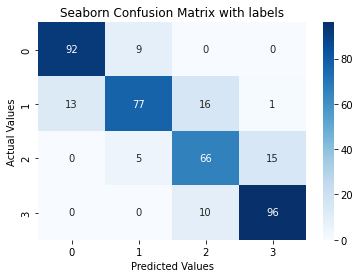

In [29]:
cf_matrix1 = confusion_matrix(pred,Y_test)
sns.heatmap(cf_matrix1, annot=True, cmap='Blues')
plt.title("Seaborn Confusion Matrix with labels")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [25]:
svc=SVC()
svc.fit(X_train,Y_train)

SVC()

In [26]:
pred1 = svc.predict(X_test)
pred1

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 1, 3, 2, 2, 3, 3, 1, 0, 0, 2,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 3, 1, 1, 3, 1, 3, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 1, 3, 0, 1, 2, 0, 0, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 1, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 2, 1, 0, 1, 2, 3, 0, 3, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 1, 2, 3, 2, 3, 1, 0, 0, 2, 2, 3, 2, 0, 0, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 2, 0, 0, 0, 0, 1, 3, 2, 2, 0, 1,
       1, 0, 1, 1, 2, 2, 2, 3, 1, 2, 0, 0, 0, 2, 0, 1, 3, 1, 0, 2, 2, 1,
       3, 1, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 1, 3, 1, 0, 1, 3, 3, 0, 1, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 2, 3, 0, 1, 2,
       2, 2, 3, 0, 1, 3, 2, 2, 2, 1, 0, 1, 0, 2, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 2, 0, 1, 2, 3, 2, 3, 1, 0, 0, 1, 3, 3,

In [27]:
from sklearn.metrics import accuracy_score
svc_acc = accuracy_score(pred1,Y_test)
print(svc_acc)

0.8825


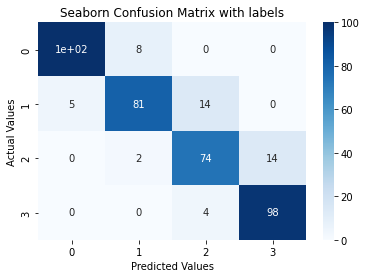

In [30]:
cf_matrix2 = confusion_matrix(pred1,Y_test)
sns.heatmap(cf_matrix2, annot=True, cmap='Blues')
plt.title("Seaborn Confusion Matrix with labels")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [33]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [34]:
pred2 = lr.predict(X_test)
pred2

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 1, 3, 2, 0,
       2, 2, 2, 1, 3, 1, 3, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 1, 2, 3, 3, 2, 1, 0, 0, 2, 2, 2, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 1, 0, 2, 3, 1, 0, 1, 3, 3, 0, 1, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 0, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 2, 3, 0, 2, 3, 2, 2, 2, 1, 0, 1, 0, 2, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 2, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [41]:
from sklearn.metrics import accuracy_score,classification_report
lr_acc = accuracy_score(pred2,Y_test)
print(lr_acc)
classfica = classification_report(pred2, Y_test)
print(classfica)

0.9525
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       107
           1       0.98      0.92      0.95        97
           2       0.90      0.91      0.91        91
           3       0.93      0.99      0.96       105

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



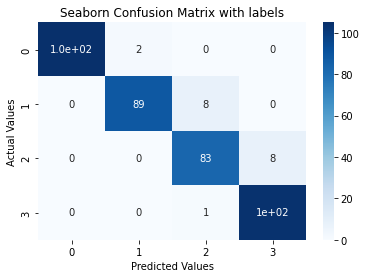

In [36]:
cf_matrix3 = confusion_matrix(pred2,Y_test)
sns.heatmap(cf_matrix3, annot=True, cmap='Blues')
plt.title("Seaborn Confusion Matrix with labels")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [48]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [49]:
pred3 = knn.predict(X_test)
pred3

array([0, 1, 0, 2, 0, 1, 1, 0, 3, 1, 0, 1, 1, 3, 1, 2, 2, 3, 0, 0, 0, 1,
       0, 1, 0, 1, 3, 2, 1, 0, 2, 0, 2, 1, 2, 3, 2, 0, 3, 0, 0, 2, 3, 0,
       2, 0, 1, 2, 3, 0, 1, 2, 1, 0, 1, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 1,
       2, 3, 2, 3, 1, 3, 0, 2, 2, 1, 0, 3, 2, 1, 3, 0, 1, 0, 0, 3, 1, 3,
       3, 0, 3, 3, 2, 2, 3, 1, 1, 3, 0, 1, 0, 1, 1, 0, 0, 2, 2, 0, 2, 1,
       0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 1, 1, 3, 1, 3, 1, 0, 2, 1, 2, 2, 0,
       1, 2, 1, 3, 1, 1, 0, 2, 1, 1, 0, 2, 1, 0, 2, 0, 2, 2, 3, 0, 1, 0,
       3, 1, 0, 2, 1, 1, 0, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 0, 1, 1, 2, 0,
       0, 2, 1, 0, 0, 0, 2, 0, 1, 3, 2, 3, 0, 0, 0, 1, 0, 3, 3, 2, 0, 0,
       1, 0, 0, 1, 1, 3, 2, 1, 0, 2, 0, 0, 0, 1, 2, 1, 2, 2, 0, 0, 0, 1,
       2, 1, 2, 0, 0, 2, 2, 3, 0, 1, 1, 0, 1, 3, 2, 0, 0, 3, 2, 0, 1, 2,
       1, 3, 0, 2, 1, 1, 2, 2, 1, 3, 1, 3, 3, 1, 3, 2, 2, 2, 3, 0, 2, 1,
       1, 0, 2, 0, 1, 3, 1, 1, 1, 2, 0, 1, 1, 3, 3, 1, 2, 1, 0, 3, 1, 2,
       1, 0, 1, 0, 2, 1, 2, 2, 0, 1, 1, 0, 0, 3, 3,

In [50]:
from sklearn.metrics import accuracy_score,classification_report
knn_acc = accuracy_score(pred3,Y_test)
print(knn_acc)
classfi = classification_report(pred3, Y_test)
print(classfi)

0.5125
              precision    recall  f1-score   support

           0       0.73      0.66      0.69       117
           1       0.43      0.33      0.37       120
           2       0.36      0.34      0.35        96
           3       0.50      0.84      0.63        67

    accuracy                           0.51       400
   macro avg       0.51      0.54      0.51       400
weighted avg       0.51      0.51      0.50       400



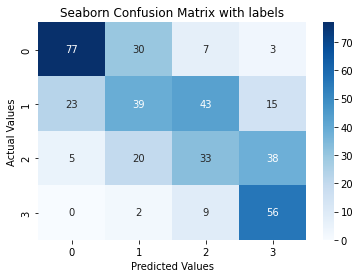

In [59]:
cf_matrix4 = confusion_matrix(pred3,Y_test)
sns.heatmap(cf_matrix4, annot=True, cmap='Blues')
plt.title("Seaborn Confusion Matrix with labels")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()